In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#forward propogation 만 설치해 주면 back prop을 자동으로 이르켜 주는 GradientTape
#forward prop을 기록해 준다 

In [15]:
t1 = tf.Variable([1,2,3], dtype = tf.float32)
t2 = tf.Variable([10,20,30], dtype = tf.float32)

# instantiate GradientTape class
with tf.GradientTape() as tape:
    t3 = t1 * t2

print(t1.numpy())
print(t2.numpy())
print(t3.numpy(), "\n")

# tape에 저장되있는 forward propagation을 가지고
# t3의 대해서 t1,t2의 편미분 -> dt3/dt1 , dt3/dt2 (dL/dW, dL/db 와 같은 개념)
gradients = tape.gradient(t3, [t1,t2]) #(내가 원하는 target, [내가 원하는 gradient])
print(type(gradients))
print("dt1:",gradients[0])
print("dt2:",gradients[1]) 

[1. 2. 3.]
[10. 20. 30.]
[10. 40. 90.] 

<class 'list'>
dt1: tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
dt2: tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


In [16]:
t1 = tf.Variable([1,2,3], dtype = tf.float32)
t2 = tf.Variable([10,20,30], dtype = tf.float32)

# instantiate GradientTape class
with tf.GradientTape() as tape:
    t3 = t1 * t2
    t4 = t3 + t2
print(t1.numpy())
print(t2.numpy())
print(t3.numpy(), "\n")

# tape에 저장되있는 forward propagation을 가지고
# t3의 대해서 t1,t2의 편미분 -> dt3/dt1 , dt3/dt2 (dL/dW, dL/db 와 같은 개념)
gradients = tape.gradient(t4, [t1,t2,t3]) #(내가 원하는 target, [내가 원하는 gradient])
print(type(gradients))
print("dt1:",gradients[0])
print("dt2:",gradients[1]) 
print("dt3:",gradients[2]) 

[1. 2. 3.]
[10. 20. 30.]
[10. 40. 90.] 

<class 'list'>
dt1: tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
dt2: tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)
dt3: tf.Tensor([1. 1. 1.], shape=(3,), dtype=float32)


In [17]:
t4.numpy()

array([ 20.,  60., 120.], dtype=float32)

In [19]:
t1 = tf.constant([1,2,3], dtype = tf.float32) #constant 이기에 back prop이 일어날 필요가 X
t2 = tf.Variable([10,20,30], dtype = tf.float32)

with tf.GradientTape() as tape:
    t3 = t1 * t2
print(t1.numpy())
print(t2.numpy())
print(t3.numpy(), "\n")


gradients = tape.gradient(t3, [t1,t2]) #(내가 원하는 target, [내가 원하는 gradient])
print(type(gradients))
print("dt1:",gradients[0])# t1에 대한 dt1은 None
print("dt2:",gradients[1]) 


[1. 2. 3.]
[10. 20. 30.]
[10. 40. 90.] 

<class 'list'>
dt1: None
dt2: tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


In [48]:
#linear regression

x_data = tf.random.normal(shape = (1000,), dtype = tf.float32)
y_data = 3 * x_data + 1

print(x_data.dtype)
print(y_data.dtype)

<dtype: 'float32'>
<dtype: 'float32'>


In [49]:
#Single variable linear regression
w = tf.Variable(-1, dtype = tf.float32)
b = tf.Variable(-1, dtype = tf.float32)
LR = 0.01

#log
w_trace, b_trace = [],[]

#하나씩 돌면서
for x,y in zip(x_data,y_data):
    #Gradient tape을 만들고 기록한다
    with tf.GradientTape() as tape:    
        
        # y_hat = wx + b or xw + b
        prediction = w*x + b
        
        #mean square error
        loss = (prediction-y)**2
        
    # 기록된 gradients를 이용해 update
    gradients = tape.gradient(loss, [w, b]) #loss에 대해서 w와 b의 gradient를 받는다
    
    #SGD
    w_trace.append(w.numpy())
    b_trace.append(b.numpy())
    w = tf.Variable(w - LR*gradients[0])# 괄호 안은 constant tensor때문에 
    b = tf.Variable(b - LR*gradients[1])
        

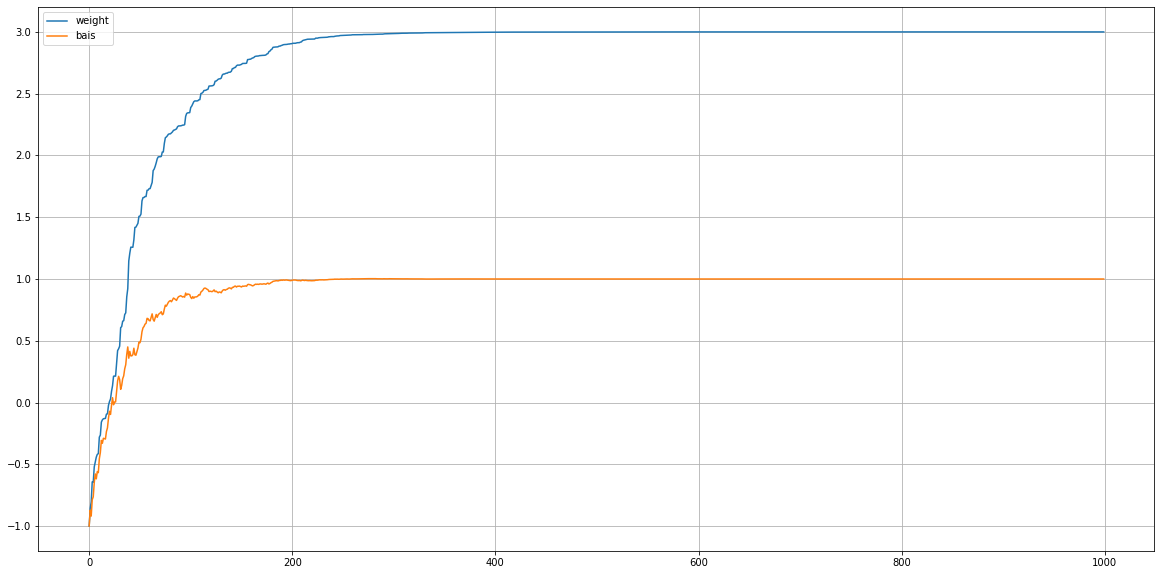

In [52]:
fig,ax = plt.subplots(figsize = (20,10))
ax.plot(w_trace, label = "weight")
ax.plot(b_trace, label = "bais")
ax.legend()
ax.grid()

In [34]:
a = w - LR*gradients[0]
a.dtype

tf.float32